<a href="https://colab.research.google.com/github/edefang/Housing-development-/blob/main/public_housing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1. Loading the Data

We have a file called `Public_Housing_Developments_cleaned.csv`. We will load it into a "DataFrame", which is just a variable name for our table of data.

In [ ]:
# Load the data from the CSV file
df = pd.read_csv('Public_Housing_Developments_cleaned.csv')

# Let's look at the first 5 rows to see what the data looks like
df.head()

,objectid,participant_code,formal_participant_name,development_code,project_name,scattered_site_ind,pd_status_type_code,total_units,total_dwelling_units,acc_units,...,last_updt_dttm,annl_expns_amnt,annl_expns_amnt_prev_yr,ha_phn_num,ha_fax_num,ha_email_addr_text,exec_dir_phone,exec_dir_email,x,y
0,1,FL065,Macclenny Housing Authority,FL065000001,MACCLENNY HA,N,M,80,80,80,...,2025-07-16 23:20:45,411443,541745.0,9042596881,9042599459,ktolin_mha@nefcom.net,9042596881,ktolin_mha@nefcom.net,-82.118025,30.285794
1,2,FL076,RIVIERA BEACH HOUSING AUTHORITY,FL076000003,Heron Estates Senior,N,M,101,101,11,...,2025-07-16 23:20:45,74947,34252.0,5618457450,8004318738,jhurt@rbhafl.org,5618457450,jhurt@rbhafl.org,-80.089971,26.778887
2,3,FL082,Housing Authority of the City of Winter Park,FL082000001,The Meadows and Tranquil Terrace,Y,M,171,171,171,...,2025-07-16 23:20:45,914139,509410.0,4076452869,4076294575,tgrant@winterparkha.org,4076452869,tgrant@winterparkha.org,-81.360256,28.602072
3,4,FL136,Hollywood Housing Authority,FL136000001,Driftwood Terrace /ApolloTerrace,N,M,120,120,120,...,2025-07-16 23:20:45,529106,358727.0,9549894691,9549618010,tony@hhafl.com,9549894691,tony@hhafl.com,-80.234833,26.040242
4,5,AR024,West Memphis Housing Authority,AR024000001,Courtyard Apts.,N,M,357,348,348,...,2025-07-16 23:20:45,2025916,2560668.0,8707353520,8707351772,sheliahandy@comcast.net,8707353520,sheliahandy@comcast.net,-90.149314,35.142503


## 2. Understanding the Data

Before we dive deep, we need to know the basics:
- How many rows (housing developments) and columns (information about them) do we have?
- Are there any missing values (empty cells)?

In [ ]:
# Check the size of the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 6297
Number of columns: 127


In [ ]:
# Get a summary of the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6297 entries, 0 to 6296
Columns: 127 entries, objectid to y
dtypes: float64(73), int64(24), object(30)
memory usage: 6.1+ MB


## 3. Exploring Key Numbers

Let's look at some important statistics. We want to know things like the average rent, the average income of households, and occupancy rates.

In [ ]:
# We select a few interesting columns to summarize
columns_of_interest = [
    'total_units',
    'pct_occupied',
    'rent_per_month',
    'hh_income',      # Household income
    'pct_minority'    # Percentage of minority residents
]

# The describe() function gives us count, mean (average), min, max, etc.
df[columns_of_interest].describe()

,total_units,pct_occupied,rent_per_month,hh_income,pct_minority
count,6297.000000,6297.000000,6297.000000,6297.000000,6297.000000
mean,148.190885,89.495026,377.316818,17738.471653,56.657291
std,205.734829,20.007887,187.132988,8681.620941,39.632646
min,1.000000,0.000000,-4.000000,-4.000000,-4.000000
25%,50.000000,90.660000,307.000000,14045.000000,12.770000
50%,100.000000,96.000000,372.000000,17664.000000,69.570000
75%,175.000000,98.700000,455.000000,22116.000000,95.740000
max,2391.000000,100.000000,1539.000000,74539.000000,100.000000


## 3.5 Creating New Helpful Variables (Feature Engineering)

Sometimes the data we have is good, but we can make it even better by combining columns. This is called "Feature Engineering".

We will create a few new variables to help us understand the data better:
- **Vacancy Rate**: The opposite of occupancy rate (100% - Occupied %).
- **Rent to Income Ratio**: How much of a household's income goes to rent? (Rent / Income).
- **Dominant Race**: Which racial group is the largest in each development?
- **Size Category**: Is the development Small, Medium, or Large?

In [ ]:
import numpy as np

# 1. Vacancy Rate
# If we have the occupancy percentage, vacancy is just 100 minus that.
df['vacancy_rate'] = 100 - df['pct_occupied']

# 2. Rent to Income Ratio
# We need to be careful not to divide by zero!
# We calculate annual rent first (monthly rent * 12)
df['annual_rent'] = df['rent_per_month'] * 12
df['rent_to_income_ratio'] = df['annual_rent'] / df['hh_income']

# 3. Dominant Race
# We look at the percentages of different groups and see which is highest.
# We use a function called 'idxmax' which finds the column with the maximum value.
race_columns = ['pct_black', 'pct_hispanic', 'pct_asian', 'pct_native_american']
# We also need to consider White, which is often (100 - pct_minority)
df['pct_white'] = 100 - df['pct_minority']
all_race_cols = race_columns + ['pct_white']

# This line is a bit advanced, but it finds the column name with the highest value for each row
df['dominant_race'] = df[all_race_cols].idxmax(axis=1).str.replace('pct_', '').str.capitalize()

# 4. Size Category
# We group developments by how many units they have.
# Small: 0-50, Medium: 51-200, Large: 201-500, Very Large: 500+
df['size_category'] = pd.cut(df['total_dwelling_units'],
                             bins=[0, 50, 200, 500, np.inf],
                             labels=['Small', 'Medium', 'Large', 'Very Large'])

# Let's check our new columns
df[['vacancy_rate', 'rent_to_income_ratio', 'dominant_race', 'size_category']].head()

## 4. Visualizing the Data

Numbers are great, but pictures are often better! Let's create some graphs to understand the distribution of our data.

### Distribution of Rent per Month
How much rent do people typically pay? Is it mostly low, or is there a wide range?

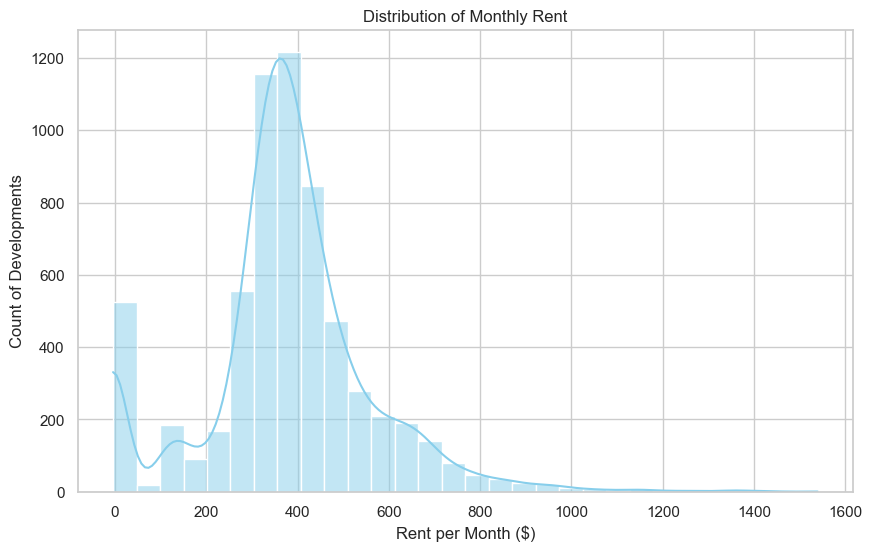

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rent_per_month'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Rent')
plt.xlabel('Rent per Month ($)')
plt.ylabel('Count of Developments')
plt.show()

### Household Income vs. Rent
Is there a relationship between how much money a household makes and how much rent they pay? We can use a scatter plot to see this.

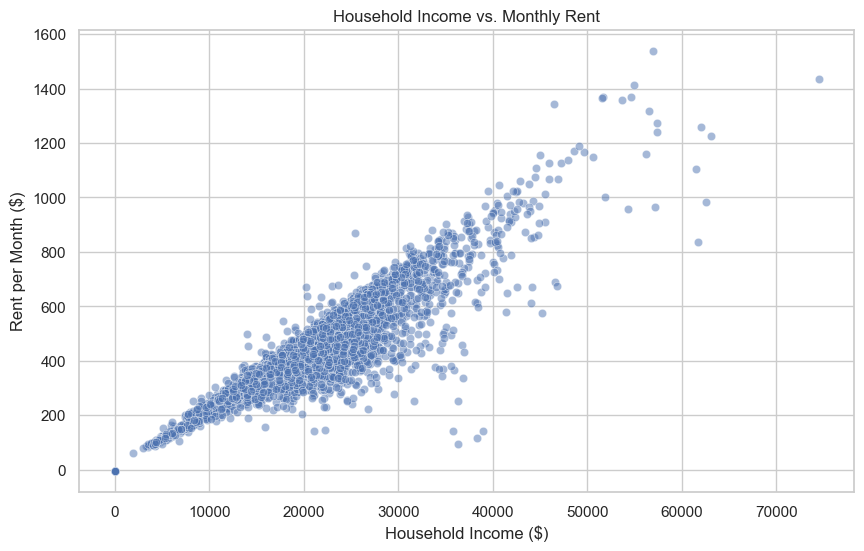

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hh_income', y='rent_per_month', alpha=0.5)
plt.title('Household Income vs. Monthly Rent')
plt.xlabel('Household Income ($)')
plt.ylabel('Rent per Month ($)')
plt.show()

### Affordability Analysis
Now that we calculated the **Rent to Income Ratio**, let's see how affordable these homes are. A common rule of thumb is that housing is "affordable" if it costs less than 30% of your income.

In [ ]:
plt.figure(figsize=(10, 6))
# We limit the x-axis to 1.0 (100% of income) to remove extreme outliers for a clearer view
sns.histplot(df['rent_to_income_ratio'], bins=50, kde=True, color='purple')
plt.xlim(0, 1)
plt.axvline(0.3, color='red', linestyle='--', label='30% Affordability Threshold')
plt.title('Distribution of Rent-to-Income Ratio')
plt.xlabel('Rent to Income Ratio (0.3 = 30%)')
plt.ylabel('Count')
plt.legend()
plt.show()

### Occupancy Rates
Are most housing developments full? Let's look at the percentage of occupied units.

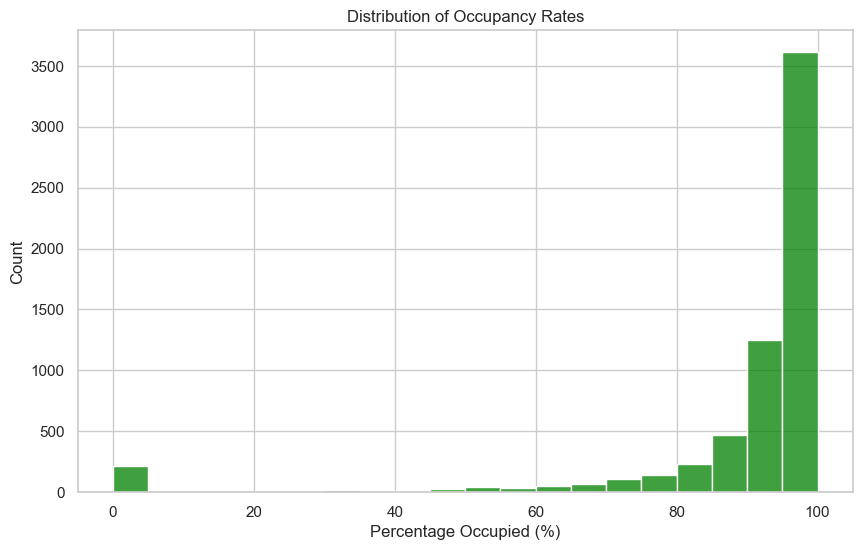

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pct_occupied'], bins=20, color='green')
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Percentage Occupied (%)')
plt.ylabel('Count')
plt.show()

### Demographics: Who lives here?
Let's look at the racial composition of the developments using our new `dominant_race` variable.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dominant_race', palette='Set2', order=df['dominant_race'].value_counts().index)
plt.title('Number of Developments by Dominant Racial Group')
plt.xlabel('Dominant Race')
plt.ylabel('Count of Developments')
plt.show()

### Development Size
Are most public housing projects big towers or smaller buildings? We can use the `size_category` we created.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='size_category', palette='pastel')
plt.title('Distribution of Development Sizes')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

## 5. Geographic Distribution

Since we have latitude and longitude data, we can plot where these housing developments are located. This gives us a simple map!

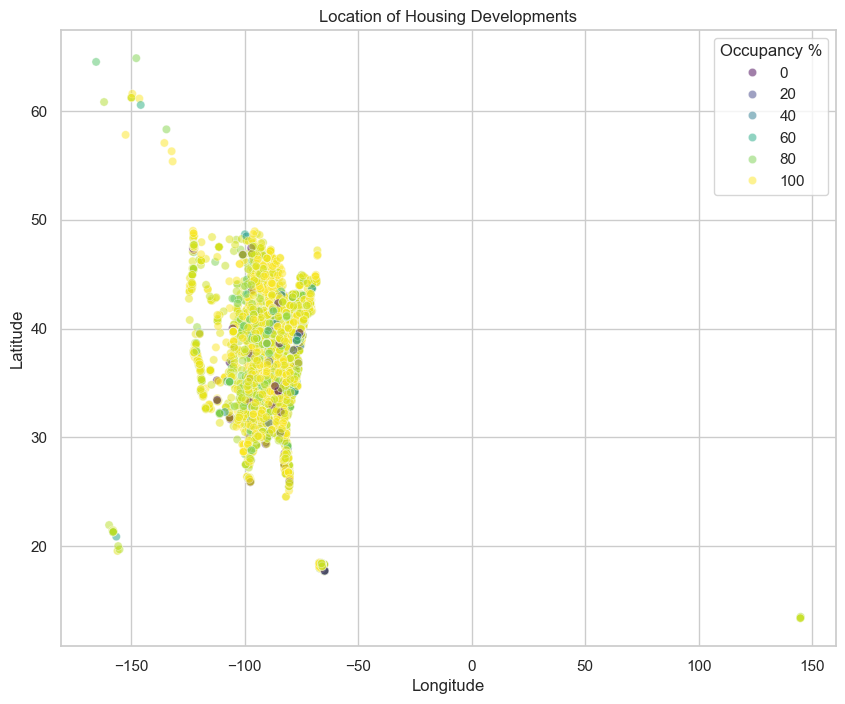

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='lon', y='lat', alpha=0.5, hue='pct_occupied', palette='viridis')
plt.title('Location of Housing Developments')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Occupancy %')
plt.show()

## Conclusion

In this short analysis, we loaded the public housing data and looked at some key features. We found out:
- The range of rents and incomes.
- That most developments have high occupancy rates.
- Where the developments are located geographically.

This is just the beginning! There are many more questions we could ask, like "Do larger developments have lower rents?" or "Which areas have the highest occupancy?"